In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import json

from scipy.stats import ks_2samp, chisquare

fakePHSP = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/fake.txt'
truePHSP = '/data1/dose-3d-generative/data/training-data/PHSPs_without_VR/Filtered_E5.6_s0.0.txt' 
#'/net/scratch/people/plgztabor/primo_workdir/PHSPs_without_VR/ANGLE_0/TXT/Filtered_E6.0_s2.0.txt'

f = open(fakePHSP,'rt')
lines = f.readlines()
f.close()

fake = [r.split() for r in lines]
fake = np.asarray(fake,dtype=np.float32)

f = open(truePHSP,'rt')
lines = f.readlines()
f.close()

real = [r.split() for r in lines]
real = np.asarray(real,dtype=np.float32)

signs = np.random.randint(0,2,real.shape[0])*2-1
real[:,0] = real[:,0]*signs
real[:,1] = real[:,1]*signs
real[:,2] = real[:,2]*signs
real[:,3] = real[:,3]*signs




# bins = np.linspace(0, 6, 300)
# plt.figure(figsize = (10,10))
# plt.hist(real[:,5],bins,alpha=0.25,label='r',density=True)
# plt.hist(fake[:,5],bins,alpha=0.25,label='f',density=True)
# plt.legend(loc='upper right')
# #plt.show()

In [2]:
ks_statistics_sum=0
ks_statistics_list=[]
ks_pvalue_sum=0
ks_pvalue_list=[]

for index in range(6):
    ks_statistic,ks_pvalue=ks_2samp(real[:,index],fake[:,index])
    ks_statistics_sum+=ks_statistic
    ks_pvalue_sum+=ks_pvalue
    ks_pvalue_list.append(ks_pvalue)
    ks_statistics_list.append(ks_statistic)

print(ks_statistics_sum)
print(ks_statistics_list)

print(ks_pvalue_sum)
print(ks_pvalue_list)

0.06043176302911382
[0.0016919471658592422, 0.0014522321488202872, 0.002625559544335132, 0.0022683965758220903, 0.012072984392428321, 0.04032064320184875]
1.1121826502003009e-10
[2.4057361927588475e-14, 1.1119420765810231e-10, 6.04727339829653e-34, 1.9085628599817823e-25, 0.0, 0.0]


0.022019542873739965
[1.9509786504041388e-06, 1.8052013303968864e-06, 0.00018169192337131882, 0.0001792520583632861, 0.02014153680332985, 0.001513305908694709]


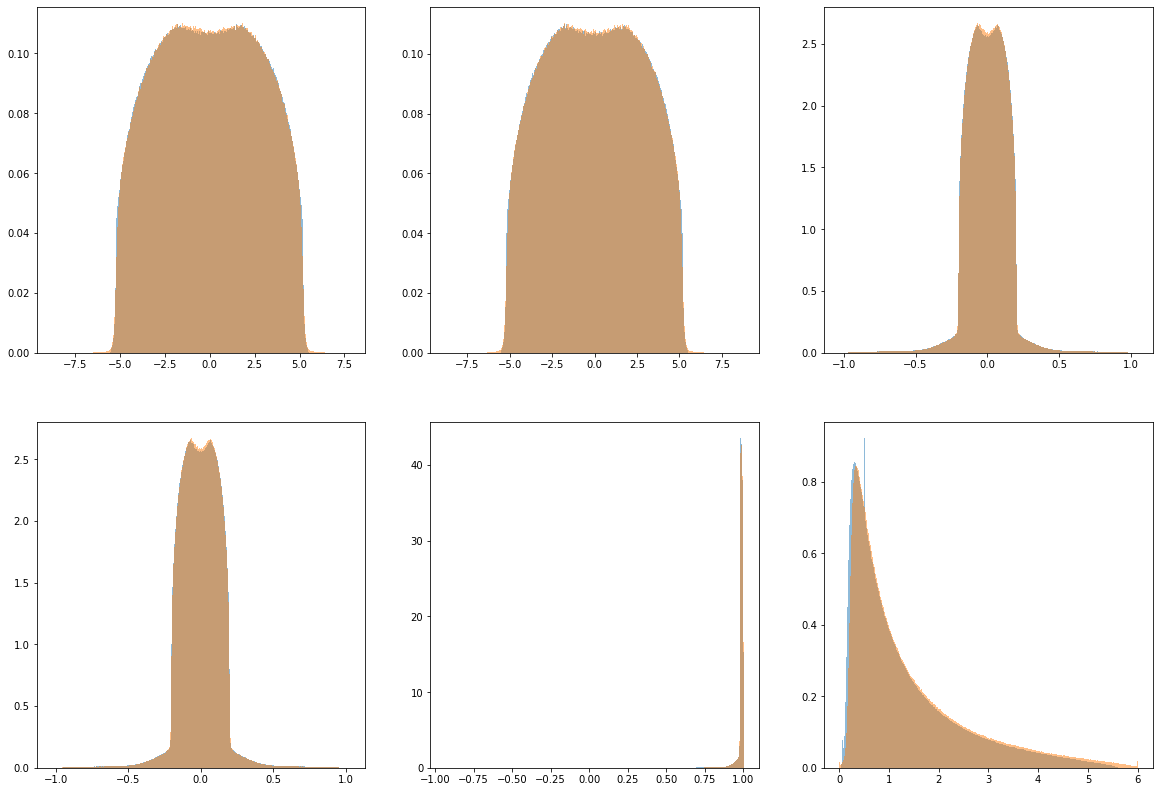

In [3]:
histogram_freq_real_mse=[]
histogram_freq_fake_mse=[]

mse_statistics_sum=0
mse_statistics_list=[]



fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 14)

for index in range(6):
    mi = np.minimum(real[:,index].min(), fake[:,index].min())
    ma = np.maximum(real[:,index].max(), fake[:,index].max())

    bins = np.linspace(mi, ma, 300)
    tmp_histogram_freq_real_mse,_,_=axs.flatten()[index].hist(real[:,index], bins, alpha=.5, density=True, stacked = True)
    tmp_histogram_freq_fake_mse,_,_=axs.flatten()[index].hist(fake[:,index], bins, alpha=.5, density=True, stacked = True)


    histogram_freq_real_mse.append(tmp_histogram_freq_real_mse)
    histogram_freq_fake_mse.append(tmp_histogram_freq_fake_mse)

    mse_statistic=mean_squared_error(tmp_histogram_freq_real_mse,tmp_histogram_freq_fake_mse)
    mse_statistics_sum+=mse_statistic
    mse_statistics_list.append(mse_statistic)

print(mse_statistics_sum)
print(mse_statistics_list)


In [4]:
statistics_json={'ks_2samp': [
    {
        'name': 'config_001.json',
        'statistics_list': ks_statistics_list,
        'statistics_sum': ks_statistics_sum
    }
],
'mean_square_error': [
    {
        'name': 'config_001.json',
        'statistics_list': mse_statistics_list,
        'statistics_sum': mse_statistics_sum
    }
]

}

# json_string=json.dumps(data)
# print(json_string)

In [5]:
with open('/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/config_001.json') as json_file:
    config_json_object = json.load(json_file)

In [6]:
config_json_object["evaluation_results"]=statistics_json

In [7]:
with open('/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/statistics_mse_ks2samp.json', 'w') as outfile:
    json.dump(config_json_object, outfile, indent=4)

In [8]:
# import pickle
# paramsFileName = '/home/jakmic/Projekty/dose3d-phsp/GAN/CGAN/params.pkl'
# modelFileName = 'model.pth'

# infile = open(paramsFileName,'rb')
# params = pickle.load(infile)
# infile.close()